# FINAL NPZD PROTOTYPE

# done:
- completely rewrote handling of fluxes, this time registered with decorator
- add option to include all output vars to phyda.setup wrapper!
- add "group" multi flux, that can be appended to modularly (i.e. growth with monod, light-lim, etc.)
- make "group" function work with the other solvers (Stepwise + GEKKO)
    note: there is an error if I store the state of constant fluxes that are added in group_to_arg flux in odeint
    this is due to odeint errors, and I could not find a quick fix: shows importance of using different solvers!
- add "list input" of multiple vars for grazing flux!

     

In [1]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

In [2]:
from phydra.components.variables import SV
from phydra.components.fluxes import (LinearForcingInput, LinearMortalityExchange,
                                      QuadraticMortality,
                                      ExponentialGrowth, MonodGrowth,
                                      HollingTypeIII, HollingTypeIII_2Resources,
                                      Growth_Monod_Eppley_Steele)
from phydra.components.forcings import ConstantForcing, SinusoidalForcing, GlobalSlabClimatologyForcing

In [3]:
from phydra.components.fluxes import MultiLimGrowth, Monod_ML, Steele_ML, Eppley_ML

In [4]:
import numpy as np

In [5]:
NPZD = phydra.create({'Nutrient':SV, 
                      'Phytoplankton':SV,
                      'Zooplankton':SV,
                      'Detritus':SV,

                      'Input':LinearForcingInput, 
                      'Mortality':LinearMortalityExchange, 'QuadMortality':QuadraticMortality,

                      'Growth':MultiLimGrowth,
                      'Monod':Monod_ML,
                      'Steele':Steele_ML,
                      'Eppley':Eppley_ML,
                      #'Grazing':HollingTypeIII_2Resources,
                      
                      # HERE NEED TO ADD THIS:
                      'N0':GlobalSlabClimatologyForcing,
                      'Tmld':GlobalSlabClimatologyForcing,
                      'I0':GlobalSlabClimatologyForcing,
                      'MLD':GlobalSlabClimatologyForcing
                     })

In [6]:
NPZD

<xsimlab.Model (18 processes, 59 inputs)>
Core
    solver_type         [in]
Time
    time                [in] ('input_time',) sequence of time point...
Nutrient
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
Phytoplankton
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
Zooplankton
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
Detritus
    var_init            [in] initial value / basic state variable
    var_label           [in] label / basic state variable
MLD
    lat                 [in] constant value of forcing
    lon                 [in] constant value of forcing
    k                   [in] The degree of the spline fit
    rbb                 [in] constant value of forcing
    smooth              [in] smoothing conditions, larger values = ...
    forcin

'N0':{'lat':47,'lon':-20,'rbb':2,'smooth':5, 'k':2,
       'dataset':'n0x', 'show_plot':True},
'Temp':{'lat':47,'lon':-20,'rbb':2,'smooth':5, 'k':2,
       'dataset':'tmld', 'show_plot':True},
'I0':{'lat':47,'lon':-20,'rbb':2,'smooth':10, 'k':2,
       'dataset':'par', 'show_plot':True},
'MLD':{'lat':47,'lon':-20,'rbb':2,'smooth':400, 'k':2,
       'dataset':'mld', 'show_plot':True}

In [7]:
odeint_setup = phydra.setup('odeint', NPZD,
            time=np.arange(0,365*5),
            input_vars={
                'Nutrient':{'var_label':'N','var_init':3.},
                'Phytoplankton':{'var_label':'P','var_init':0.1},
                'Zooplankton':{'var_label':'Z','var_init':0.1},
                'Detritus':{'var_label':'D','var_init':0.1},
                
                'Input':{'var':'N','rate':0.1, 'forcing':'N0'},
                
                'Mortality':{'source':'P', 'sink':'D', 'rate':0.1},
                'QuadMortality':{'var':'Z', 'rate':0.01},
                
                'Growth':{'consumer':'P', 'resource':'N', 'mu_max':1.,},
                
                'Monod':{'resource':'N', 'halfsat':1.5},
                'Steele':{'pigment_biomass':'P','Light':'I0', 'MLD':'MLD',
                          'kw':0.04, 'kc':0.03, 'i_opt':2},
                'Eppley':{'Temp':'Tmld', 'eppley':0.063},
                
                #'Grazing':{'r_1':'P', 'r_2':'D', 'consumer':'Z',
                #           'fp_1':.5, 'fp_2':.5,'Imax':1., 'kZ':1.5},
                
                'N0':{'forcing_label':'N0', 'dataset':'n0x',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':5, 'k':2},
                'Tmld':{'forcing_label':'Tmld', 'dataset':'tmld',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':5, 'k':2},
                'I0':{'forcing_label':'I0', 'dataset':'par',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':10, 'k':2},
                'MLD':{'forcing_label':'MLD', 'dataset':'mld',
                      'lat':47,'lon':-20,'rbb':2,
                      'smooth':400, 'k':2},
            },
            output_vars="ALL"
            )

In [8]:
np.product([0.6666666666666666, 2.320280116712352, 0.3833972339578571])

0.593059319169953

In [9]:
with NPZD:
    odeint_out = odeint_setup.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component I0
Initializing component N0
Initializing component Tmld
Initializing component MLD
Initializing component Input
Initializing component Mortality
Initializing component QuadMortality
Initializing component Monod
Initializing component Eppley
Initializing component Steele
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.ODEINTSolver object at 0x11c672f10>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Z', 'D'] 
Parameters:['I0_dataset', 'I0_lat', 'I0_lon', 'I0_rbb', 'I0_smooth', 'I0_k', 'N0_dataset', 'N0_lat', 'N0_lon', 'N0_rbb', 'N0_smooth', 'N0_k', 'Tmld_dataset', 'Tmld_lat', 'Tmld_lon', 'Tmld_rbb', 'Tmld_smooth', 'Tmld_k', 'MLD_dataset', 'MLD_lat', 'MLD_lon', 'MLD_rbb', 'MLD_smooth', 'MLD_k', 'Input_rate', 'Mortality_rate', 'Qu

In [10]:
odeint_out

<xarray.Dataset>
Dimensions:                         (clock: 2, input_time: 1825, time: 1825)
Coordinates:
  * clock                           (clock) int64 0 1
Dimensions without coordinates: input_time, time
Data variables:
    Core__solver_type               <U6 'odeint'
    Detritus__var_init              float64 0.1
    Detritus__var_label             <U1 'D'
    Detritus__var_value             (time) float64 0.1 0.1129 ... 621.9 622.3
    Eppley__Temp                    <U4 'Tmld'
    Eppley__eppley                  float64 0.063
    Eppley__eppley_growth_label     <U20 'Eppley_eppley_growth'
    Eppley__eppley_growth_value     (time) float64 2.32 2.318 ... 2.333 2.328
    Growth__consumer                <U1 'P'
    Growth__growth_value            (time) float64 0.05931 0.07635 ... 0.4607
    Growth__mu_max                  float64 1.0
    Growth__resource                <U1 'N'
    I0__dataset                     <U3 'par'
    I0__forcing_label               <U2 'I0'
    I0__forcing_value               (time) float64 7.521 7.594 ... 7.388 7.452
    I0__k                           int64 2
    I0__lat                         int64 47
    I0__lon                         int64 -20
    I0__rbb                         int64 2
    I0__smooth                      int64 10
    Input__forcing                  <U2 'N0'
    Input__input_value              (time) float64 0.509 0.5111 ... 0.5025
    Input__rate                     float64 0.1
    Input__var                      <U1 'N'
    MLD__dataset                    <U3 'mld'
    MLD__forcing_label              <U3 'MLD'
    MLD__forcing_value              (time) float64 160.4 162.2 ... 156.8 158.6
    MLD__k                          int64 2
    MLD__lat                        int64 47
    MLD__lon                        int64 -20
    MLD__rbb                        int64 2
    MLD__smooth                     int64 400
    Monod__halfsat                  float64 1.5
    Monod__monod_lim_label          <U15 'Monod_monod_lim'
    Monod__monod_lim_value          (time) float64 0.6667 0.682 ... 0.4635
    Monod__resource                 <U1 'N'
    Mortality__death_value          (time) float64 0.01 0.01292 ... 0.4263
    Mortality__rate                 float64 0.1
    Mortality__sink                 <U1 'D'
    Mortality__source               <U1 'P'
    N0__dataset                     <U3 'n0x'
    N0__forcing_label               <U2 'N0'
    N0__forcing_value               (time) float64 5.09 5.133 ... 5.003 5.047
    N0__k                           int64 2
    N0__lat                         int64 47
    N0__lon                         int64 -20
    N0__rbb                         int64 2
    N0__smooth                      int64 5
    Nutrient__var_init              float64 3.0
    Nutrient__var_label             <U1 'N'
    Nutrient__var_value             (time) float64 3.0 3.435 ... 1.275 1.317
    Phytoplankton__var_init         float64 0.1
    Phytoplankton__var_label        <U1 'P'
    Phytoplankton__var_value        (time) float64 0.1 0.1634 ... 4.246 4.28
    QuadMortality__death_value      (time) float64 0.0001 9.99e-05 ... 1.25e-05
    QuadMortality__rate             float64 0.01
    QuadMortality__var              <U1 'Z'
    Steele__Light                   <U2 'I0'
    Steele__MLD                     <U3 'MLD'
    Steele__i_opt                   int64 2
    Steele__kc                      float64 0.03
    Steele__kw                      float64 0.04
    Steele__pigment_biomass         <U1 'P'
    Steele__steele_light_lim_label  <U23 'Steele_steele_light_lim'
    Steele__steele_light_lim_value  (time) float64 0.3834 0.3741 ... 0.1001
    Time__time                      (input_time) int64 0 1 2 ... 1822 1823 1824
    Tmld__dataset                   <U4 'tmld'
    Tmld__forcing_label             <U4 'Tmld'
    Tmld__forcing_value             (time) float64 13.36 13.33 ... 13.43 13.39
    Tmld__k                         int64 2
    Tmld__lat                       int64 4

In [11]:
import matplotlib.pyplot as plt

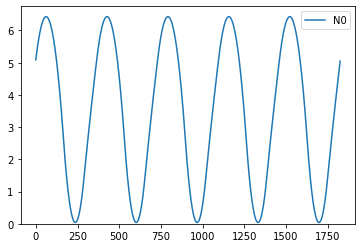

In [12]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.N0__forcing_value, label='N0')
plt.ylim(bottom=0)
plt.legend()

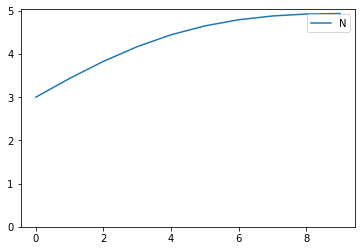

In [13]:
time = odeint_out.Time__time[0:10]
plt.plot(time, odeint_out.Nutrient__var_value[0:10], label='N')
plt.ylim(bottom=0)
plt.legend()

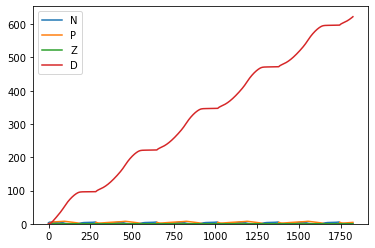

In [14]:
time = odeint_out.Time__time
plt.plot(time, odeint_out.Nutrient__var_value, label='N')
plt.plot(time, odeint_out.Phytoplankton__var_value, label='P')
plt.plot(time, odeint_out.Zooplankton__var_value, label='Z')
plt.plot(time, odeint_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

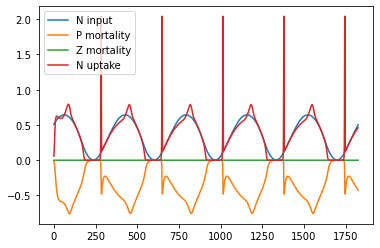

In [17]:
plt.plot(time, odeint_out.Input__input_value, label='N input')
plt.plot(time, -odeint_out.Mortality__death_value, label='P mortality')
plt.plot(time, -odeint_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, odeint_out.Growth__growth_value, label='N uptake')
#plt.plot(time, odeint_out.Grazing__grazing_value, label='Grazing')
#plt.ylim(bottom=0)
plt.legend()

In [18]:
stepwise_setup = phydra.update_setup(model=NPZD, old_setup=odeint_setup, new_solver="stepwise",
                                     new_time=np.arange(0,365*5,.5))

In [19]:
with NPZD:
    stepwise_out = stepwise_setup.xsimlab.run()

initializing model backend
Initializing Model Time
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component I0
Initializing component N0
Initializing component Tmld
Initializing component MLD
Initializing component Input
Initializing component Mortality
Initializing component QuadMortality
Initializing component Monod
Initializing component Eppley
Initializing component Steele
Initializing component Growth
assembling model
SOLVER : <phydra.backend.solvers.StepwiseSolver object at 0x16c7acd60>
Model is assembled:
Model contains: 
Variables:['time', 'N', 'P', 'Z', 'D'] 
Parameters:['I0_dataset', 'I0_lat', 'I0_lon', 'I0_rbb', 'I0_smooth', 'I0_k', 'N0_dataset', 'N0_lat', 'N0_lon', 'N0_rbb', 'N0_smooth', 'N0_k', 'Tmld_dataset', 'Tmld_lat', 'Tmld_lon', 'Tmld_rbb', 'Tmld_smooth', 'Tmld_k', 'MLD_dataset', 'MLD_lat', 'MLD_lon', 'MLD_rbb', 'MLD_smooth', 'MLD_k', 'Input_rate', 'Mortality_rate', '

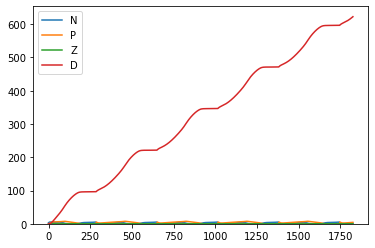

In [20]:
time = stepwise_out.Time__time
plt.plot(time, stepwise_out.Nutrient__var_value, label='N')
plt.plot(time, stepwise_out.Phytoplankton__var_value, label='P')
plt.plot(time, stepwise_out.Zooplankton__var_value, label='Z')
plt.plot(time, stepwise_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

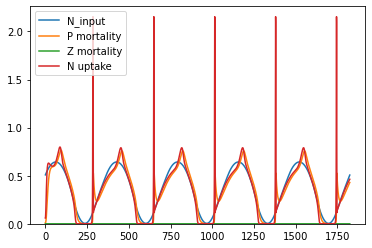

In [21]:
plt.plot(time, stepwise_out.Input__input_value, label='N_input')
plt.plot(time, stepwise_out.Mortality__death_value, label='P mortality')
plt.plot(time, stepwise_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, stepwise_out.Growth__growth_value, label='N uptake')
#plt.plot(time, stepwise_out.Grazing__grazing_value, label='Grazing')
plt.ylim(bottom=0)
plt.legend()

In [8]:
gekko_setup = phydra.update_setup(model=NPZD, 
                                  old_setup=odeint_setup, 
                                  new_solver="gekko", 
                                  # gekko solver works better (much faster) with smaller time steps:
                                  # new_time=np.arange(0,201,.1)
                                 )

In [9]:
with NPZD:
    gekko_out = gekko_setup.xsimlab.run()

initializing model backend
Initializing Model Time
PARAMETERS defaultdict(None, {})
Time_time_flux 1 <class 'int'>
Flux_OUT time_time_flux
Initializing component Nutrient
Initializing component Phytoplankton
Initializing component Zooplankton
Initializing component Detritus
Initializing component MLD
adding parameter MLD_dataset mld
adding parameter MLD_lat 47
adding parameter MLD_lon -20
adding parameter MLD_rbb 2
adding parameter MLD_smooth 400
adding parameter MLD_k 2
Initializing component Tmld
adding parameter Tmld_dataset tmld
adding parameter Tmld_lat 47
adding parameter Tmld_lon -20
adding parameter Tmld_rbb 2
adding parameter Tmld_smooth 5
adding parameter Tmld_k 2
Initializing component N0
adding parameter N0_dataset n0x
adding parameter N0_lat 47
adding parameter N0_lon -20
adding parameter N0_rbb 2
adding parameter N0_smooth 5
adding parameter N0_k 2
Initializing component I0
adding parameter I0_dataset par
adding parameter I0_lat 47
adding parameter I0_lon -20
adding param

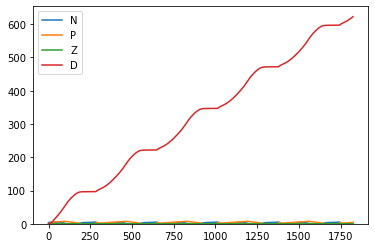

In [12]:
time = gekko_out.Time__time
plt.plot(time, gekko_out.Nutrient__var_value, label='N')
plt.plot(time, gekko_out.Phytoplankton__var_value, label='P')
plt.plot(time, gekko_out.Zooplankton__var_value, label='Z')
plt.plot(time, gekko_out.Detritus__var_value, label='D')
plt.ylim(bottom=0)
plt.legend()

AttributeError: 'Dataset' object has no attribute 'Grazing__grazing_value'

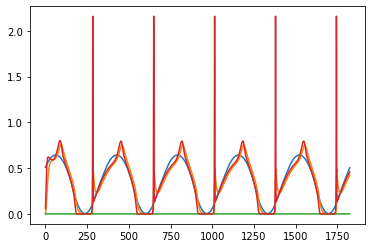

In [13]:
plt.plot(time, gekko_out.Input__input_value, label='N_input')
plt.plot(time, gekko_out.Mortality__death_value, label='P mortality')
plt.plot(time, gekko_out.QuadMortality__death_value, label='Z mortality')
plt.plot(time, gekko_out.Growth__growth_value, label='N uptake')
plt.plot(time, gekko_out.Grazing__grazing_value, label='Grazing')
plt.ylim(bottom=0)
plt.legend()